In [9]:
import pandas as pd
df=pd.read_csv('mnist_train.csv')

In [10]:
df.shape

(42000, 785)

In [11]:
data=df.values
x=data[:,1:]
y=data[:,0]
split=int(0.8*data.shape[0])
X_train=data[ :split,1:]
Y_train=data[ :split,0]
X_test=data[split:,1:]
Y_test=data[split:,0]
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

#step-1 NORMALISING THE DATA USING SKLEARN LIBRARY (MEAN=0,STANDARD DEVIATION=1)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
x_=sc.fit_transform(X_test)

In [14]:
x_.shape

(8400, 784)

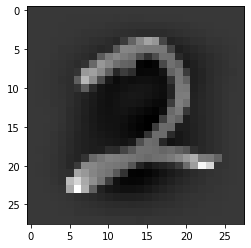

In [15]:
import matplotlib.pyplot  as plt
plt.imshow(x_[90].reshape(28,28),cmap='gray')

##SKLEARN PCA

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
z_pca=pca.fit_transform(x_)

In [18]:
z_pca.shape

(8400, 2)

##AS WE CAN SEE FROM 784 FEATURES , THE DATA HAS BEEN CONVERTED INTO A LOWER DIMENSION I.E 2

In [20]:
z_pca

array([[20.75945655, -0.72343896],
       [-1.57714071,  4.46961886],
       [-6.84737792,  1.85667561],
       ...,
       [ 0.51595708,  6.88189255],
       [ 2.25355548, -4.29062891],
       [-4.79547643,  1.5136851 ]])

In [19]:
pca.explained_variance_

array([42.34445302, 28.78019086])

#THE EXPLAINED VARIANCE TELLS US WHAT PERCENTAGE EACH PRINCIPAL COMPONENT EXPLAINS DATA SO IN THIS CASE PC1 IS EXPLANING AROUND 42% OF THE TOTAL VARIANCE OF THE DATA AND PC2 AROUND 29%,IN OTHER WORDS WE  HAVE LOST 100-(42+29)%=30%(APPROX) INFORMATION OF THE ORIGINAL DATA 

##CUSTOM PCA

In [21]:
import numpy as np

#step-2- computing covariance matrix

In [22]:
covar=np.dot(x_.T,x_)
covar.shape

(784, 784)

#Step-3 computing eigen vectors using SVD

In [23]:
from numpy.linalg import svd

In [24]:
u,s,v=svd(covar)

In [25]:
u.shape

(784, 784)

In [26]:
u_red=u[:,:2]
u_red.shape

(784, 2)

#step-4 projection of data on new axis (components) 

In [28]:
z=np.dot(x_,u_red)
z.shape

(8400, 2)

#VISUALISING THE DATASET

In [31]:
new=np.hstack((z,Y_test.reshape(-1,1)))

In [32]:
df2=pd.DataFrame(new,columns=['PC1','PC2','LABEL'])

In [33]:
df2.head()

,PC1,PC2,LABEL
0,-20.759505,0.722916,0.0
1,1.577133,-4.470211,7.0
2,6.847372,-1.857002,7.0
3,-6.571688,0.427609,2.0
4,-1.152728,0.475057,2.0


<Figure size 1080x1080 with 0 Axes>

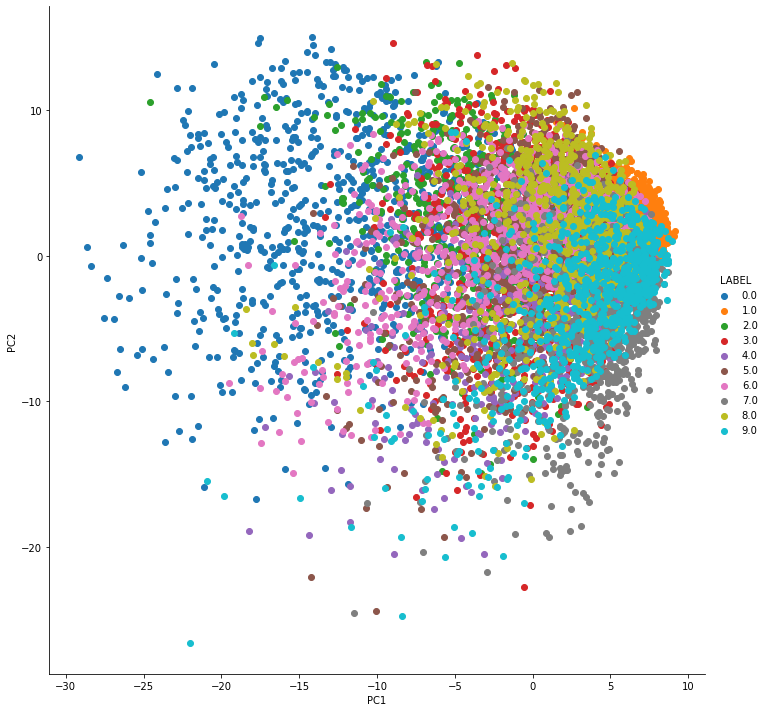

In [35]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg=sns.FacetGrid(df2,hue='LABEL',height=10)
fg.map(plt.scatter,"PC1","PC2")
fg.add_legend()
plt.show()

#PCA WITH 784 COMPONENTS

In [37]:
pca=PCA()
z_pca=pca.fit_transform(x_)
z_pca.shape

(8400, 784)

In [39]:
pca.explained_variance_[:20]

array([42.34445302, 28.78019106, 26.35328281, 20.84711177, 18.72320072,
       16.10501266, 13.66030955, 12.37021492, 10.98512146, 10.45188342,
        9.76519716,  8.83534367,  8.19214729,  7.80121448,  7.40202506,
        7.17738396,  6.88495793,  6.69744755,  6.53560297,  6.37551137])

In [41]:
pca.explained_variance_ratio_[:20]

array([0.06347738, 0.04314358, 0.03950547, 0.03125132, 0.02806742,
       0.02414257, 0.02047779, 0.01854384, 0.01646749, 0.01566812,
       0.01463873, 0.01324482, 0.01228062, 0.01169458, 0.01109617,
       0.01075941, 0.01032105, 0.01003996, 0.00979734, 0.00955735])

In [42]:
cum_var_explained=np.cumsum(pca.explained_variance_ratio_)

In [43]:
cum_var_explained

array([0.06347738, 0.10662095, 0.14612642, 0.17737774, 0.20544516,
       0.22958774, 0.25006552, 0.26860936, 0.28507685, 0.30074497,
       0.31538371, 0.32862852, 0.34090914, 0.35260372, 0.36369989,
       0.3744593 , 0.38478035, 0.39482031, 0.40461764, 0.41417499,
       0.42345982, 0.43227942, 0.44067217, 0.44876777, 0.45665118,
       0.46440056, 0.4718558 , 0.47908446, 0.48615413, 0.49294407,
       0.49955417, 0.50611673, 0.51227413, 0.51842435, 0.52449712,
       0.53041984, 0.53621559, 0.54195959, 0.5475752 , 0.55298469,
       0.55829489, 0.56349122, 0.56860057, 0.57365725, 0.57850879,
       0.58333104, 0.58805879, 0.59270375, 0.59727948, 0.60183913,
       0.60634754, 0.61072568, 0.61507204, 0.6193559 , 0.62361408,
       0.62774257, 0.6318552 , 0.63585004, 0.63982043, 0.64372412,
       0.64752457, 0.65129542, 0.6550191 , 0.6586944 , 0.66226677,
       0.66577782, 0.66923881, 0.6726613 , 0.67607033, 0.67943552,
       0.68277469, 0.68607155, 0.68929833, 0.69251472, 0.69568

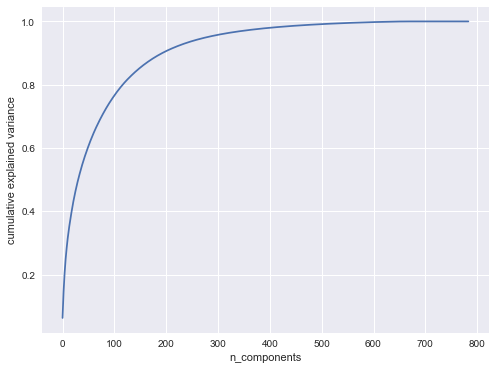

In [45]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(cum_var_explained)
plt.xlabel('n_components')
plt.ylabel('cumulative explained variance')
plt.show()

#FROM THIS GRAPH WE CAN DECIDE WHAT NUMBER OF FEATURES WE CAN REDUCE TO IN ORDER TO RETAIN 90-95% OF INFORMATION OF THE ORIGINAL DATA